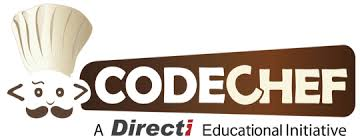

 # Introduction
To those who are seeing this notebook. This example is on the Exploratory Data Analysis on Disease Outbreaks in Nigeria using Jupyter Notebook.The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more. So make sure you guys understand the concept of how do to an EDA and complete your mini project before the deadline as failing to do so will lead to heavy consequences.There are so many things that you can do regarding Jupyter notebook. You can even write the HTML tags in it and many more.This is a very short exampke of EDA, you should explore more graphs and techniques for an EDA. Best of luck and make an awesome notebook.

## Exploratory Analysis
To begin any exploratory analysis, you should first always plan your EDA map(how you are going to start etc.) and import the necesary libraires and define functions for plotting the data using 'matplotlib' or any other suitable libraries. The basic method of EDA is same(data cleaning and transformation, numerical simulation, statistical modeling, data visualization) for all the datasets just the execution of the program changes. 

### Importing Libraries
Some of the basic libraries used for the EDA

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## Importing Dataset
* There is a csv file in my current working directory folder:
1. **Importing it**


In [0]:
print(os.listdir('../input'))

## Data Visualization
The next hidden code cells define functions for plotting data.Click on the "Code" button in the notebook to reveal the hidden code.

In [0]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [0]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [0]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Above examples were to shown how to do a basic data visualization in EDA.Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check another file: ../input/meningitis_dataset.csv
Note: These datasets are in my kernel not in yours so running in your kernel will generate eror.

In [0]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# meningitis_dataset.csv has 284484 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../input/meningitis_dataset.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'meningitis_dataset.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

## Basic EDA on this dataset

Let's take a quick look at what the data looks like:

In [0]:
df1.head(5)

Distribution graphs (histogram/bar graph) of sampled columns:

In [0]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

In [0]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

In [0]:
plotScatterMatrix(df1, 20, 10)

## Conclusion
This notebook was just an overview of how to do an EDA. I think you guys have got the idea for your **mini-project**. Download your Mini project dataset and start doing dataset exploratory. First go throughly to the whole notebook in github. After that download it and run a jupyter notebook in your host machine and import this notebook. You will see how the markdowns are really helpful in making of an EDA.Make a really nice and awesome notebook on your respective projects and use other techinques also. **If you have any doubts about the notebooks , kernels or anything contact me or any of the technical member of the codechef.** So happy coding and make the best use of this notebook. Best of luck !

**TEAM CODECHEF-VIT**